In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('200521COVID19MEXICO.csv',encoding= 'unicode_escape',parse_dates=[0,10,11,12])
df2 = pd.read_excel('actas-defuncion-covid-19-cdmx.xlsx',parse_dates=[1])

In [3]:
df1.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,...,2,2,2,2,99,1,99,MÃ©xico,99,1
2,2020-05-21,04f631,2,4,14,1,14,14,67,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-21,0356d5,2,4,9,1,9,9,5,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2


In [4]:
df2.head()

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
0,41 AÑOS,2020-03-18,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
1,61 AÑOS,2020-03-23,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2,60 AÑOS,2020-03-26,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
3,37 AÑOS,2020-03-26,13,3,NEUMONIA POR CORONAVIRUS,7879
4,63 AÑOS,2020-03-26,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [5]:
df1.shape

(201838, 35)

In [6]:
df2.shape

(4579, 6)

In [7]:
df1.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [8]:
new = df1[['FECHA_INGRESO', 'ENTIDAD_RES', 'FECHA_SINTOMAS', 'FECHA_DEF',]].copy()
new1 = df1[['RESULTADO']].copy()

In [9]:
new.head()

,FECHA_INGRESO,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF
0,2020-04-24,27,2020-04-20,2020-04-27
1,2020-03-30,5,2020-03-30,2020-04-03
2,2020-04-10,14,2020-04-07,9999-99-99
3,2020-04-07,15,2020-04-07,2020-04-20
4,2020-04-04,9,2020-04-04,9999-99-99


In [10]:
new1.RESULTADO.value_counts()

2    108980
1     59567
3     33291
Name: RESULTADO, dtype: int64

In [11]:
#According to the CATALOGO, 1 means that it is positive, so I'm going to put what it is not positive as NaN So like this I can have only positive values

In [12]:
new1 = new1.replace(2, np.nan)
new1 = new1.replace(3, np.nan)

In [13]:
new1.isnull().sum()

RESULTADO    142271
dtype: int64

In [14]:
new1

,RESULTADO
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
201833,NaN
201834,NaN
201835,NaN
201836,NaN


In [15]:
result = pd.concat([new, new1], axis=1)

In [16]:
result.head()

,FECHA_INGRESO,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF,RESULTADO
0,2020-04-24,27,2020-04-20,2020-04-27,1.0
1,2020-03-30,5,2020-03-30,2020-04-03,1.0
2,2020-04-10,14,2020-04-07,9999-99-99,1.0
3,2020-04-07,15,2020-04-07,2020-04-20,1.0
4,2020-04-04,9,2020-04-04,9999-99-99,1.0


In [17]:
result.isnull().sum()

FECHA_INGRESO          0
ENTIDAD_RES            0
FECHA_SINTOMAS         0
FECHA_DEF              0
RESULTADO         142271
dtype: int64

In [18]:
result = result.dropna()

In [19]:
result.shape

(59567, 5)

In [34]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59567 entries, 0 to 59566
Data columns (total 5 columns):
FECHA_INGRESO     59567 non-null datetime64[ns]
ENTIDAD_RES       59567 non-null int64
FECHA_SINTOMAS    59567 non-null datetime64[ns]
FECHA_DEF         59567 non-null object
RESULTADO         59567 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 2.7+ MB


In [20]:
cdmx = result[result['ENTIDAD_RES']==9]
cdmx.shape

(16758, 5)

In [21]:
cdmx.reset_index(drop=True, inplace=True)

In [22]:
cdmx.head()

,FECHA_INGRESO,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF,RESULTADO
0,2020-04-04,9,2020-04-04,9999-99-99,1.0
1,2020-04-22,9,2020-04-20,9999-99-99,1.0
2,2020-04-25,9,2020-04-23,9999-99-99,1.0
3,2020-05-04,9,2020-04-27,9999-99-99,1.0
4,2020-03-21,9,2020-03-16,2020-03-22,1.0


In [25]:
cdmx = cdmx.replace('9999-99-99', np.nan)

In [27]:
cdmx.head()

,FECHA_INGRESO,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF,RESULTADO
0,2020-04-04,9,2020-04-04,NaN,1.0
1,2020-04-22,9,2020-04-20,NaN,1.0
2,2020-04-25,9,2020-04-23,NaN,1.0
3,2020-05-04,9,2020-04-27,NaN,1.0
4,2020-03-21,9,2020-03-16,2020-03-22,1.0


In [28]:
cdmx = cdmx.dropna()

In [30]:
cdmx.shape

(1461, 5)

In [32]:
cdmx.head()

,FECHA_INGRESO,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF,RESULTADO
4,2020-03-21,9,2020-03-16,2020-03-22,1.0
7,2020-03-29,9,2020-03-29,2020-04-08,1.0
16,2020-04-14,9,2020-04-01,2020-04-12,1.0
30,2020-04-14,9,2020-04-07,2020-04-22,1.0
36,2020-03-30,9,2020-03-30,2020-04-14,1.0


In [37]:
cdmx['date_deaths_count'] = cdmx.FECHA_DEF.map(cdmx.groupby('FECHA_DEF').size())

In [38]:
cdmx

,FECHA_INGRESO,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF,RESULTADO,date_deaths_count
4,2020-03-21,9,2020-03-16,2020-03-22,1.0,1
7,2020-03-29,9,2020-03-29,2020-04-08,1.0,6
16,2020-04-14,9,2020-04-01,2020-04-12,1.0,9
30,2020-04-14,9,2020-04-07,2020-04-22,1.0,23
36,2020-03-30,9,2020-03-30,2020-04-14,1.0,23
...,...,...,...,...,...,...
16689,2020-04-10,9,2020-04-06,2020-04-21,1.0,34
16692,2020-05-11,9,2020-05-06,2020-05-16,1.0,38
16722,2020-05-02,9,2020-04-24,2020-05-08,1.0,44
16734,2020-04-21,9,2020-04-18,2020-04-29,1.0,44


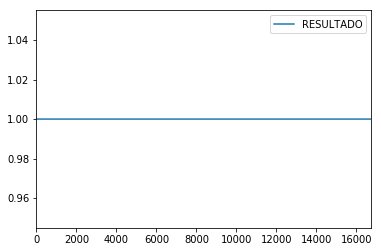

In [33]:
cdmx[['FECHA_DEF','RESULTADO']].plot()

In [23]:
import seaborn as sns

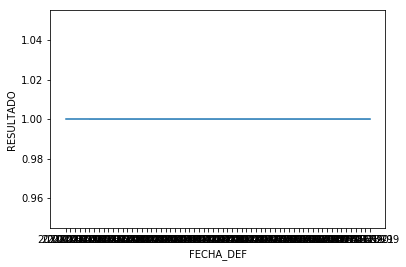

In [24]:
ax = sns.lineplot(x="FECHA_DEF", y="RESULTADO", data=result)